In [1]:
import pandas as pd

fixed_workflows_vuln_durations = pd.read_csv("fixed_workflows_vuln_durations.csv")

In [3]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.8 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


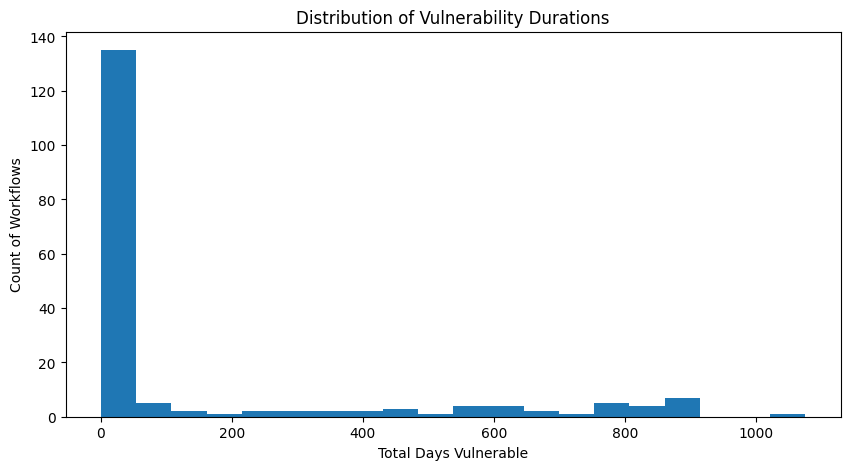

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(fixed_workflows_vuln_durations['total_days_vulnerable'], bins=20)
plt.xlabel("Total Days Vulnerable")
plt.ylabel("Count of Workflows")
plt.title("Distribution of Vulnerability Durations")
plt.show()

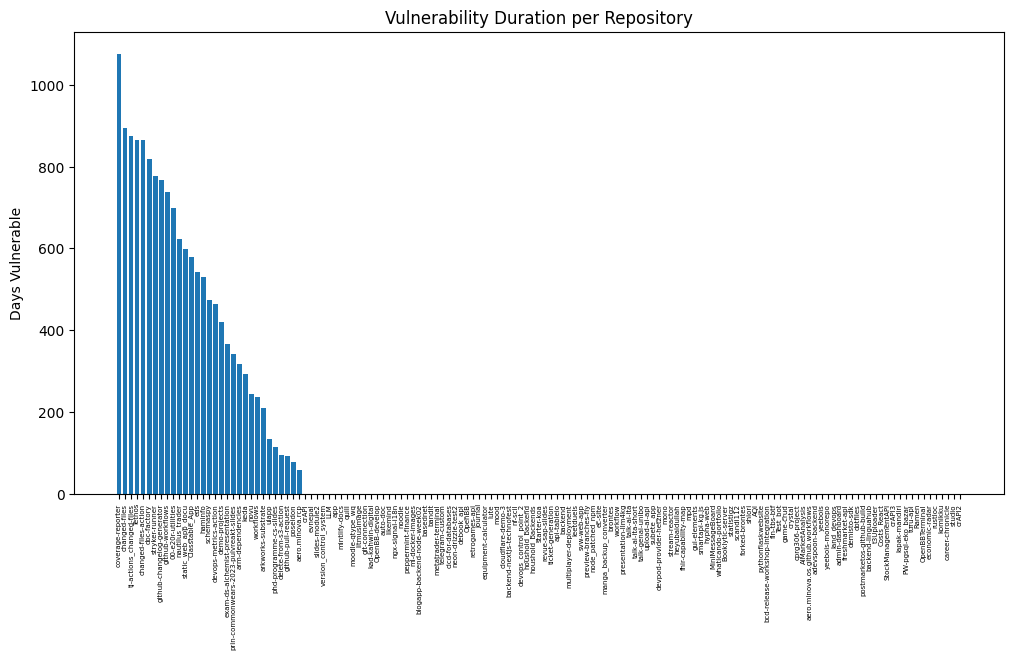

In [16]:
df_sorted = fixed_workflows_vuln_durations.sort_values("total_days_vulnerable", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_sorted["repo_name"], df_sorted["total_days_vulnerable"])
plt.xticks(rotation=90, fontsize=5)
plt.ylabel("Days Vulnerable")
plt.title("Vulnerability Duration per Repository")
plt.show()

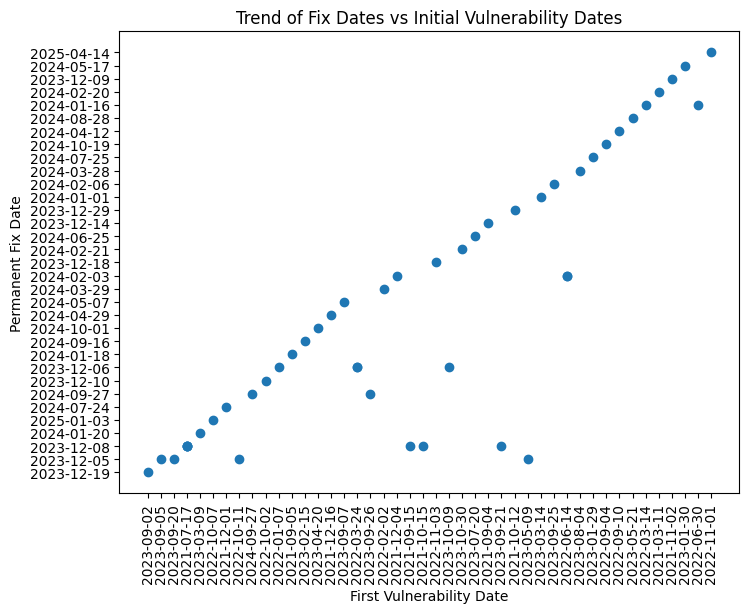

In [13]:
df_fix = fixed_workflows_vuln_durations.dropna(subset=["first_vulnerability_date", "permanent_fix_date"])

plt.figure(figsize=(8,6))
plt.scatter(df_fix["first_vulnerability_date"], df_fix["permanent_fix_date"])
plt.xlabel("First Vulnerability Date")
plt.xticks(rotation=90)
plt.ylabel("Permanent Fix Date")
plt.title("Trend of Fix Dates vs Initial Vulnerability Dates")
plt.show()

In [19]:
df_fix['first_vulnerability_date'] = pd.to_datetime(df_fix['first_vulnerability_date'], errors='coerce')
df_fix['permanent_fix_date'] = pd.to_datetime(df_fix['permanent_fix_date'], errors='coerce')


/var/folders/0y/1vh1g37j61j0kv4hcjwfgm2h0000gn/T/ipykernel_72271/1735996535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['first_vulnerability_date'] = pd.to_datetime(df_fix['first_vulnerability_date'], errors='coerce')
/var/folders/0y/1vh1g37j61j0kv4hcjwfgm2h0000gn/T/ipykernel_72271/1735996535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['permanent_fix_date'] = pd.to_datetime(df_fix['permanent_fix_date'], errors='coerce')


/var/folders/0y/1vh1g37j61j0kv4hcjwfgm2h0000gn/T/ipykernel_72271/3285264312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix["fix_month"] = df_fix["permanent_fix_date"].dt.to_period("M").dt.to_timestamp()


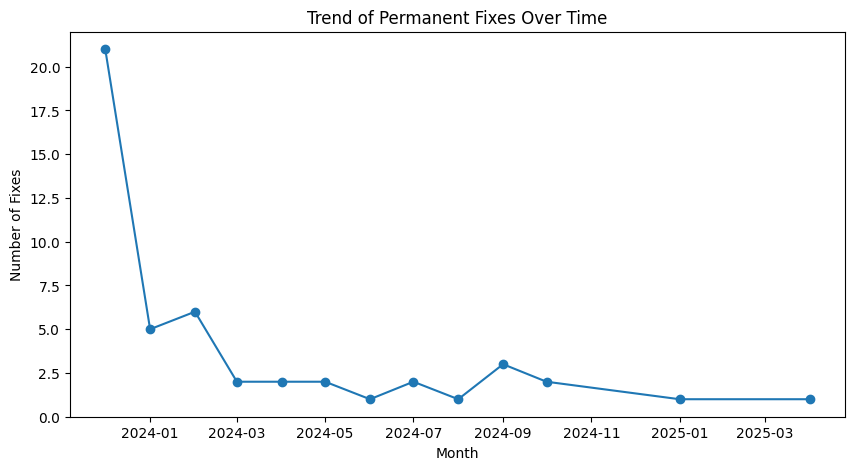

In [20]:
df_fix["fix_month"] = df_fix["permanent_fix_date"].dt.to_period("M").dt.to_timestamp()

monthly_counts = df_fix.groupby("fix_month").size()

plt.figure(figsize=(10,5))
plt.plot(monthly_counts.index, monthly_counts.values, marker="o")
plt.ylabel("Number of Fixes")
plt.xlabel("Month")
plt.title("Trend of Permanent Fixes Over Time")
plt.show()

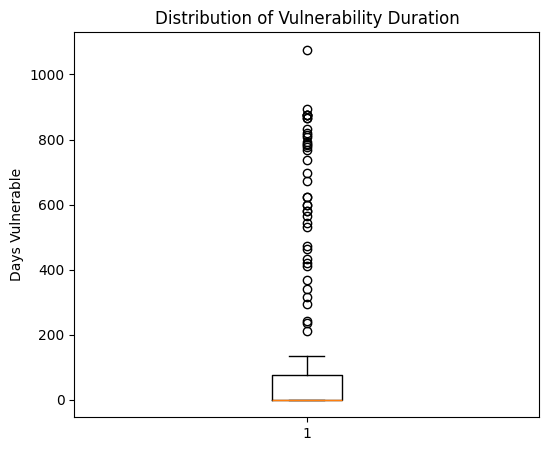

In [11]:
plt.figure(figsize=(6,5))
plt.boxplot(fixed_workflows_vuln_durations['total_days_vulnerable'])
plt.ylabel("Days Vulnerable")
plt.title("Distribution of Vulnerability Duration")
plt.show()

In [12]:
fixed_workflows_vuln_durations.nlargest(10, "total_days_vulnerable")

,owner,repo_name,workflow_name,first_vulnerability_date,permanent_fix_date,total_days_vulnerable
171,tj-actions,coverage-reporter,test,2021-03-11,2024-02-20,1076
182,zendesk,changed-files,test,2022-11-01,2025-04-14,895
10,asml-actions-validation,changed-files,test,2021-07-17,2023-12-08,874
19,basetenlabs,changed-files,test,2021-07-17,2023-12-08,874
118,postmanlabs,changed-files,test,2021-07-17,2023-12-08,874
131,rdkcentral,tj-actions_changed-files,test,2021-07-17,2023-12-08,874
34,gamechanger,changed-files-action,test,2021-09-05,2024-01-18,865
53,iamdmitrij,Tethos,stryker,2021-12-16,2024-04-29,865
108,oa-europe-observability,changed-files,test,2021-09-04,2023-12-14,831
13,axonivy-market,doc-factory,release,2022-10-07,2025-01-03,819
